In [1]:
#Problem statement
#Develop sentiment analysis model to classify restaurant reviews as positive or negative.

In [2]:
#Description
#With the rapid growth of online platforms for sharing opnions and reviews, restaurants often rely on the customer feedback to 
#improve their services and atrract the new customers.
#Analyzation
#Analaysing the sentiment of these reviews can provide the valuable insights into customer satisfaction.

In [3]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd

In [5]:
data = pd.read_csv('Reviews.csv')

In [6]:
data

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


In [7]:
#Data Preprocessing - we can analyze the data
data.head() # head() - Top Five rows of the dataset

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [8]:
data.tail() #tail() - Last Five rows of the dataset

,Review,Liked
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0
999,"Then, as if I hadn't wasted enough of my life ...",0


In [9]:
data.info() #About the data columns and information about datset like datatype , memory usage.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [10]:
data.describe() #Statistical information of the dataset.

,Liked
count,1000.00000
mean,0.50000
std,0.50025
min,0.00000
25%,0.00000
50%,0.50000
75%,1.00000
max,1.00000


In [11]:
data.isnull().sum() #Checking the null values of the dataset.

Review    0
Liked     0
dtype: int64

In [12]:
data.duplicated() #Checking the duplicates in dataset.

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool

In [13]:
#Checking the Value Counts or Votes
value_counts = data['Liked'].value_counts()
print(value_counts)

Liked
1    500
0    500
Name: count, dtype: int64


In [14]:
#Exploratory Data Analysis(EDA) - Dataset of format will be converted into pictorial With matplotlib , seaborn , wordcloud.

In [15]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [16]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

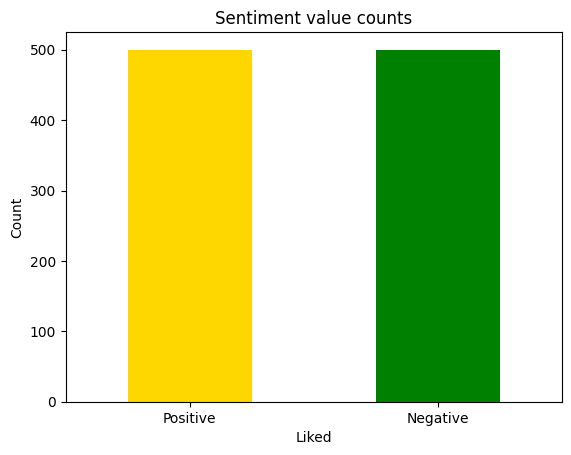

In [18]:
value_counts.plot(kind = 'bar' , color = ['gold','green'])
plt.title("Sentiment value counts")
plt.xlabel('Liked')
plt.ylabel('Count')
plt.xticks(ticks=[0,1], labels=['Positive','Negative'], rotation = 0)
plt.show()

In [19]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [20]:
from wordcloud import WordCloud #For Text Data Analysis

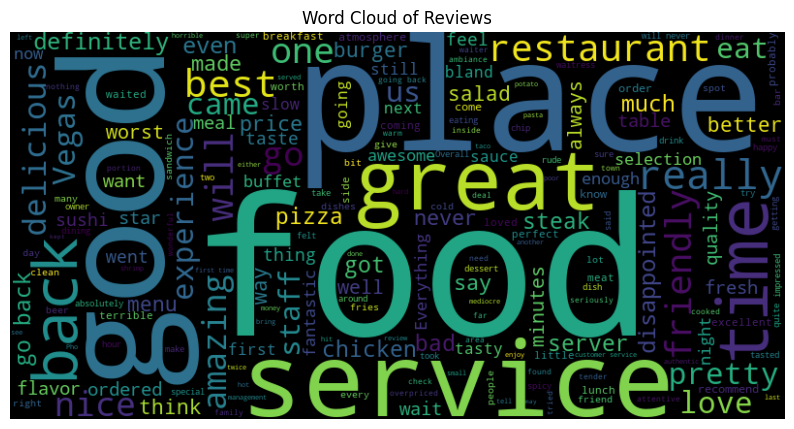

In [21]:
combined_text = " ".join(data['Review'])
wordcloud = WordCloud(width = 800 , height = 400 , background_color = 'black').generate(combined_text)
plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.title('Word Cloud of Reviews')
plt.show()

In [22]:
from collections import Counter

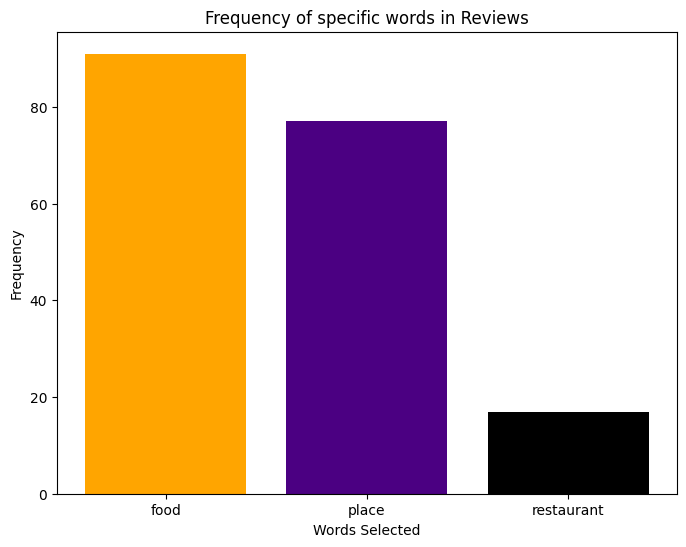

In [23]:
#Process of EDA to Explore the info within info.
target_words = ['food','place','restaurant']
all_words = " ".join(data['Review']).lower().split()
word_counts = Counter(all_words)
target_word_counts = {word:word_counts[word] for word in target_words}
plt.figure(figsize=(8,6))
plt.bar(target_word_counts.keys(), target_word_counts.values() , color = ['orange','indigo','black'])
plt.xlabel('Words Selected')
plt.ylabel('Frequency')
plt.title('Frequency of specific words in Reviews')
plt.show()

In [24]:
#Text Pre-Processing

In [25]:
#convert data set into lower case

In [122]:
lowercased_text = data['Review'].str.lower()

In [123]:
print(lowercased_text)

0                               wow    loved this place 
1                                     crust is not good 
2              not tasty and the texture was just nasty 
3      stopped by during the late may bank holiday of...
4      the selection on the menu was great and so wer...
                             ...                        
995    i think food should have flavor and texture an...
996                             appetite instantly gone 
997    overall i was not impressed and would not go b...
998    the whole experience was underwhelming  and i ...
999    then  as if i hadn t wasted enough of my life ...
Name: Review, Length: 1000, dtype: object


In [145]:
!pip install tokens

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for tokens: filename=tokens-0.0.3-py3-none-any.whl size=4231 sha256=59cd53d7b1af3a7aa74157057617c93a8e3ba710403841ce988c1704860c4ba6
  Stored in directory: c:\users\sankar\appdata\local\pip\cache\wheels\bb\a1\e1\7ab3300cfa7dd3bbff7fbe46f338b1d08f5a2598af815f25da
Successfully built tokens


In [158]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Sankar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [159]:
#Tokenization - Whole sentence will converted into small piece of text
from nltk.tokenize import word_tokenize

In [160]:
data['Tokens'] = data['Review'].apply(word_tokenize)

In [161]:
print(data['Tokens'])

0                              [Wow, Loved, this, place]
1                                 [Crust, is, not, good]
2      [Not, tasty, and, the, texture, was, just, nasty]
3      [Stopped, by, during, the, late, May, bank, ho...
4      [The, selection, on, the, menu, was, great, an...
                             ...                        
995    [I, think, food, should, have, flavor, and, te...
996                          [Appetite, instantly, gone]
997    [Overall, I, was, not, impressed, and, would, ...
998    [The, whole, experience, was, underwhelming, a...
999    [Then, as, if, I, hadn, t, wasted, enough, of,...
Name: Tokens, Length: 1000, dtype: object


In [135]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Review    1000 non-null   object
 1   Liked     1000 non-null   int64 
 2   cleaned   1000 non-null   object
 3   Expanded  1000 non-null   object
 4   emoji     1000 non-null   object
dtypes: int64(1), object(4)
memory usage: 39.2+ KB


In [136]:
data['Review'].value_counts()

Review
 NAME                                                                                                                                     4
I would not recommend this place                                                                                                          2
I love this place                                                                                                                         2
I won t be back                                                                                                                           2
Will not be back                                                                                                                          2
                                                                                                                                         ..
The burger    I got the  Gold Standard  a  17 burger and was kind of disappointed                                                         1
OMG  the food

In [137]:
#Removing punctuation marks
import string

In [138]:
data['Review'] = data['Review'].str.replace(f"[{string.punctuation}]"," ",regex = True)

In [139]:
print(data['Review'])

0                               Wow    Loved this place 
1                                     Crust is not good 
2              Not tasty and the texture was just nasty 
3      Stopped by during the late May bank holiday of...
4      The selection on the menu was great and so wer...
                             ...                        
995    I think food should have flavor and texture an...
996                             Appetite instantly gone 
997    Overall I was not impressed and would not go b...
998    The whole experience was underwhelming  and I ...
999    Then  as if I hadn t wasted enough of my life ...
Name: Review, Length: 1000, dtype: object


In [140]:
data['Review'].value_counts()

Review
 NAME                                                                                                                                     4
I would not recommend this place                                                                                                          2
I love this place                                                                                                                         2
I won t be back                                                                                                                           2
Will not be back                                                                                                                          2
                                                                                                                                         ..
The burger    I got the  Gold Standard  a  17 burger and was kind of disappointed                                                         1
OMG  the food

In [157]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Sankar\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [162]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Sankar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [163]:
#Removing the stop words like  - this, is , are , was
from nltk.corpus import stopwords

In [164]:
stop_words = set(stopwords.words('english'))

In [165]:
data['Tokens'] = data['Review'].apply(lambda x: [word for word in word_tokenize(x) if word not in stop_words])

In [166]:
print(data['Tokens'])

0                                    [Wow, Loved, place]
1                                          [Crust, good]
2                           [Not, tasty, texture, nasty]
3      [Stopped, late, May, bank, holiday, Rick, Stev...
4                  [The, selection, menu, great, prices]
                             ...                        
995           [I, think, food, flavor, texture, lacking]
996                          [Appetite, instantly, gone]
997             [Overall, I, impressed, would, go, back]
998    [The, whole, experience, underwhelming, I, thi...
999    [Then, I, wasted, enough, life, poured, salt, ...
Name: Tokens, Length: 1000, dtype: object


In [58]:
#Stemming - Which takes the present tense form in V1 ex - (driving) to drive (loved) to love
#It is the process of reducing the word into root word or base word form by removing suffix

In [167]:
#stemming :
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

In [168]:
stemmer = PorterStemmer()

In [171]:
data['stemmed'] = data['Review'].apply(lambda x:' '.join([stemmer.stem(word) for word in word_tokenize(x)]))

In [172]:
print(data['stemmed'])

0                                     wow love thi place
1                                      crust is not good
2                 not tasti and the textur wa just nasti
3      stop by dure the late may bank holiday off ric...
4      the select on the menu wa great and so were th...
                             ...                        
995    i think food should have flavor and textur and...
996                               appetit instantli gone
997        overal i wa not impress and would not go back
998    the whole experi wa underwhelm and i think we ...
999    then as if i hadn t wast enough of my life the...
Name: stemmed, Length: 1000, dtype: object


In [173]:
#Lemmatization - process of tranforming a word into its base or dictionary form (ex - better tranforms to good)
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Sankar\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [174]:
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet

In [175]:
lemmatizer = WordNetLemmatizer()

In [178]:
data['Lemmatized'] = data['Review'].apply(lambda x:' '.join([lemmatizer.lemmatize(word , pos = wordnet.VERB) for word in word_tokenize(x)]))

In [179]:
print(data['Lemmatized'])

0                                   Wow Loved this place
1                                      Crust be not good
2                Not tasty and the texture be just nasty
3      Stopped by during the late May bank holiday of...
4      The selection on the menu be great and so be t...
                             ...                        
995    I think food should have flavor and texture an...
996                                Appetite instantly go
997       Overall I be not impress and would not go back
998    The whole experience be underwhelming and I th...
999    Then as if I hadn t waste enough of my life th...
Name: Lemmatized, Length: 1000, dtype: object


In [81]:
#Removing the numerical data from data set.(reviews)
#ex - The food is good i have visited 8 out of 10 times.(removing numbers)

In [181]:
import re
data['No Numbers'] = data['Review'].apply(lambda x : re.sub(r'\d+',' ',x))

In [182]:
print(data['No Numbers'])

0                               Wow    Loved this place 
1                                     Crust is not good 
2              Not tasty and the texture was just nasty 
3      Stopped by during the late May bank holiday of...
4      The selection on the menu was great and so wer...
                             ...                        
995    I think food should have flavor and texture an...
996                             Appetite instantly gone 
997    Overall I was not impressed and would not go b...
998    The whole experience was underwhelming  and I ...
999    Then  as if I hadn t wasted enough of my life ...
Name: No Numbers, Length: 1000, dtype: object


In [93]:
#Removing the special characters - @ , # , ! , *
data['cleaned'] = data['Review'].apply(lambda x: re.sub(r'[^A-Za-z0-9\s]','' ,x)) 

In [95]:
print(data['cleaned'])

0                               Wow    Loved this place 
1                                     Crust is not good 
2              Not tasty and the texture was just nasty 
3      Stopped by during the late May bank holiday of...
4      The selection on the menu was great and so wer...
                             ...                        
995    I think food should have flavor and texture an...
996                             Appetite instantly gone 
997    Overall I was not impressed and would not go b...
998    The whole experience was underwhelming  and I ...
999    Then  as if I hadn t wasted enough of my life ...
Name: cleaned, Length: 1000, dtype: object


In [183]:
#Expanding Method
# ex: Don't eat food in this hotel, when we apply expanded text it will convert into do not eat food in this hotel.

In [184]:
pip install contractions

Note: you may need to restart the kernel to use updated packages.


In [185]:
#Expanding the text
import contractions
data['Expanded'] = data['Review'].apply(contractions.fix)

In [186]:
print(data['Expanded'])

0                               Wow    Loved this place 
1                                     Crust is not good 
2              Not tasty and the texture was just nasty 
3      Stopped by during the late May bank holiday of...
4      The selection on the menu was great and so wer...
                             ...                        
995    I think food should have flavor and texture an...
996                             Appetite instantly gone 
997    Overall I was not impressed and would not go b...
998    The whole experience was underwhelming  and I ...
999    Then  as if I hadn t wasted enough of my life ...
Name: Expanded, Length: 1000, dtype: object


In [187]:
#Removing Emojis - i like this food
!pip install emoji

In [188]:
#removing emojis from the text
import emoji
data['emoji'] = data['Review'].apply(emoji.demojize)

In [189]:
print(data['emoji'])

0                               Wow    Loved this place 
1                                     Crust is not good 
2              Not tasty and the texture was just nasty 
3      Stopped by during the late May bank holiday of...
4      The selection on the menu was great and so wer...
                             ...                        
995    I think food should have flavor and texture an...
996                             Appetite instantly gone 
997    Overall I was not impressed and would not go b...
998    The whole experience was underwhelming  and I ...
999    Then  as if I hadn t wasted enough of my life ...
Name: emoji, Length: 1000, dtype: object


In [116]:
#Removing the links from the review text ex - like visit www.abc.com
!pip install beautifulsoup4

In [191]:
from bs4 import BeautifulSoup

In [192]:
#Last step of the Data Cleaning - removing the hypertext links
data['cleaned'] = data['Review'].apply(lambda x: BeautifulSoup(x,"html.parser").get_text())

In [193]:
print(data['cleaned'])

0                               Wow    Loved this place 
1                                     Crust is not good 
2              Not tasty and the texture was just nasty 
3      Stopped by during the late May bank holiday of...
4      The selection on the menu was great and so wer...
                             ...                        
995    I think food should have flavor and texture an...
996                             Appetite instantly gone 
997    Overall I was not impressed and would not go b...
998    The whole experience was underwhelming  and I ...
999    Then  as if I hadn t wasted enough of my life ...
Name: cleaned, Length: 1000, dtype: object
